In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from libraries import tfim_functions
from libraries import utils
from libraries import training
import torch
import torch.nn as nn
import numpy as np
import kan

In [2]:
# import pickle
# with open('../MLP_MC/data/n_10_20_tests_data.p', 'rb') as fp:
#     mlp_unlagged = pickle.load(fp)
# n_values = [10, 20, 30]; h_values = [0.1, 1, 10]
# trials = 3
# all_data = pd.DataFrame({'N':[], 'h':[], 'trial':[], 'epoch':[], 'energy':[], 'epoch time':[]})
# all_data = all_data.set_index(['N', 'h', 'trial', 'epoch'])
# for N in n_values:
#     for h in h_values:
#         for t in range(trials):
#             energies = mlp_unlagged[(N, h, t)]
#             for i in range(len(energies)):
#                 all_data.loc[(N, h, t, i), ['energy', 'epoch time']] = energies[i].item(), np.nan
# all_data.to_csv('../MLP_MC/data/MLP_n_10-20_data.csv')

In [3]:
mlp_unlagged = pd.read_csv('../MLP_MC/data/MLP_n_10-20_data.csv') # note uses 256 samples
mlp_lagged = pd.read_csv('../MLP_MC/data/MLP_n_10-40_data.csv') # uses 512 samples
print(mlp_unlagged.shape, mlp_unlagged['epoch'].max())
print(mlp_lagged.shape, mlp_lagged['epoch'].max())

(27000, 6) 999.0
(36000, 6) 999.0


In [4]:
kan_unlagged = pd.read_csv('../KAN_MC/data/KAN_n_10_data.csv') # uses 256 samples
kan_lagged = pd.read_csv('../KAN_MC/data/KAN_n_10_20_data.csv') # uses 512 samples
print(kan_unlagged.shape, kan_unlagged['epoch'].max())
print(kan_lagged.shape, kan_lagged['epoch'].max())

(3000, 6) 199.0
(1800, 6) 299.0


In [5]:
mlp_unlagged.columns

Index(['N', 'h', 'trial', 'epoch', 'energy', 'epoch time'], dtype='object')

In [6]:
def filter_data(df, col, N, h, t):
    return df[col].loc[(df['N'] == N) & (df['h'] == h) & (df['trial'] == t)]

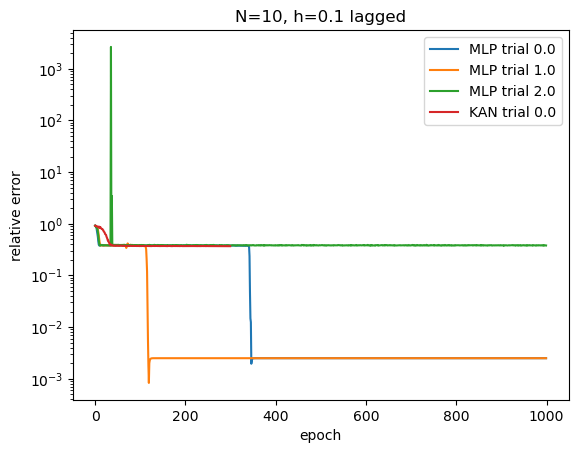

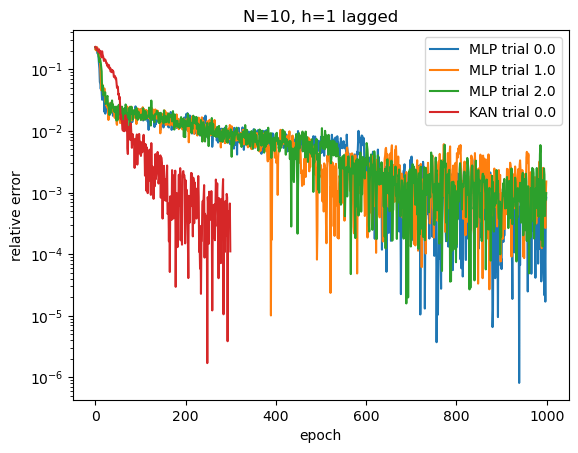

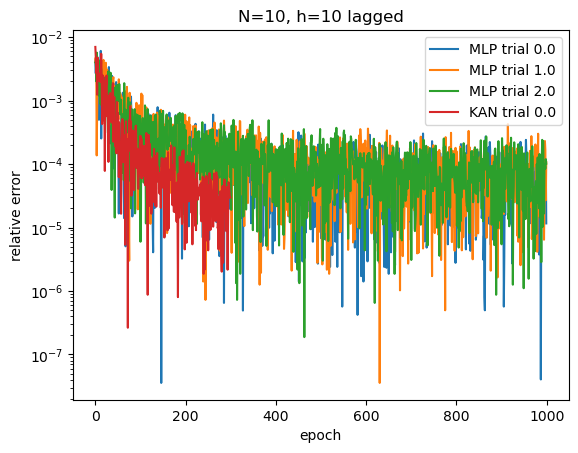

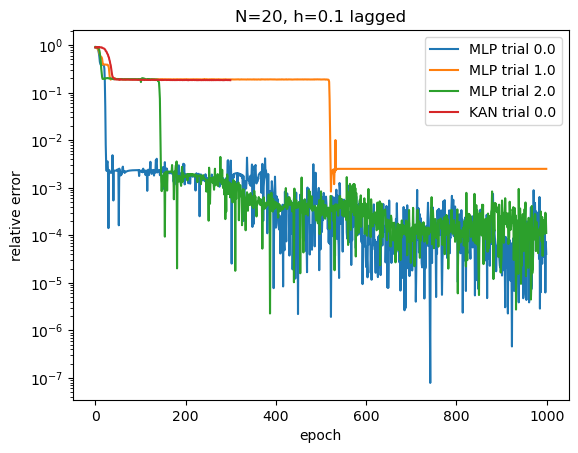

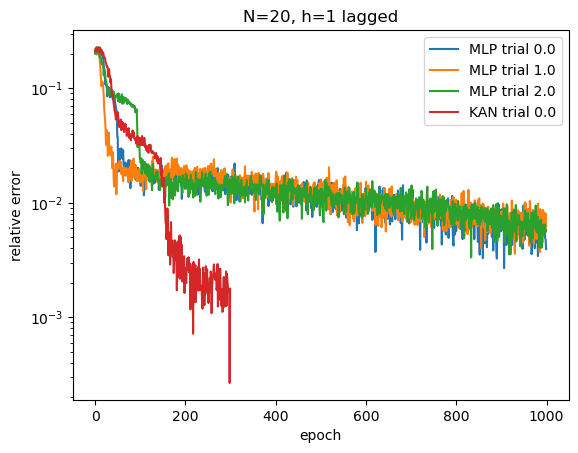

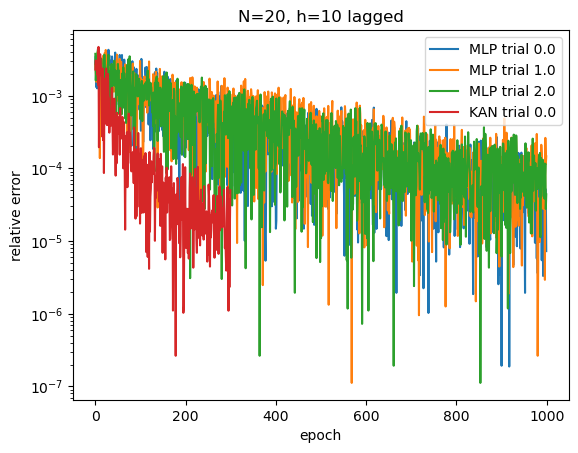

In [7]:
for N in [10, 20]:
    for h in [0.1, 1, 10]:
        true_gse = tfim_functions.ground_state_energy(h, N)
        for t in mlp_lagged['trial'].unique():
            mlp_energies = filter_data(mlp_lagged, 'energy', N, h, t)
            errors = abs((mlp_energies - true_gse) / true_gse)
            plt.plot(mlp_lagged['epoch'].unique(), errors, label = f'MLP trial {t}')
        for t in kan_lagged['trial'].unique():
            kan_energies = filter_data(kan_lagged, 'energy', N, h, t)
            errors = abs((kan_energies - true_gse) / true_gse)
            plt.plot(kan_lagged['epoch'].unique(), errors, label = f'KAN trial {t}')
        plt.xlabel('epoch')
        plt.ylabel('relative error')
        plt.legend(loc = 'best')
        plt.yscale('log')
        plt.title(f'N={N}, h={h} lagged')
        plt.show()

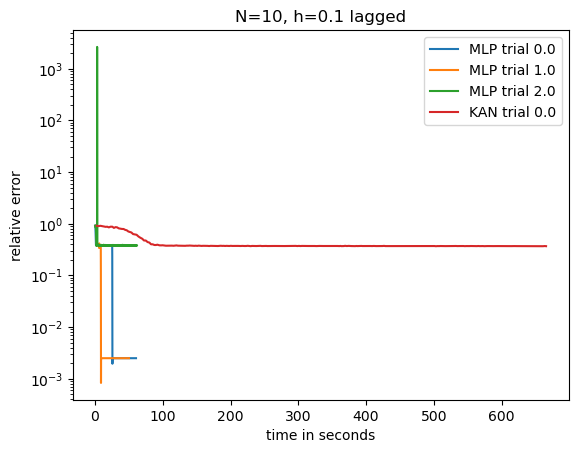

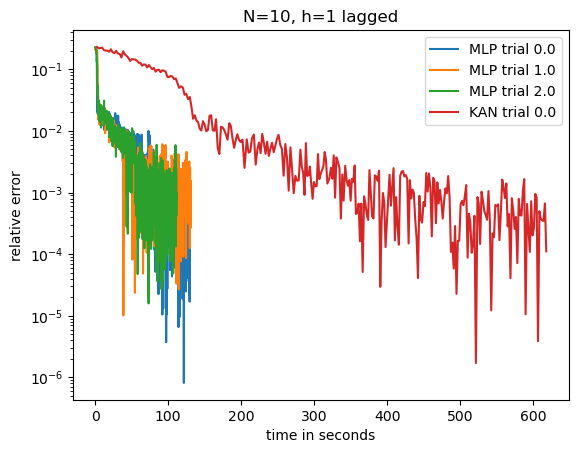

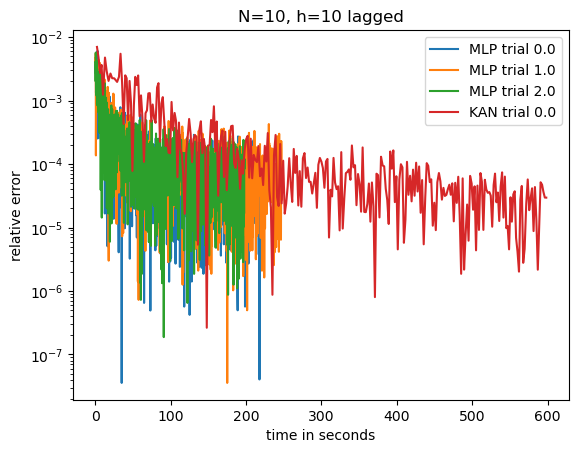

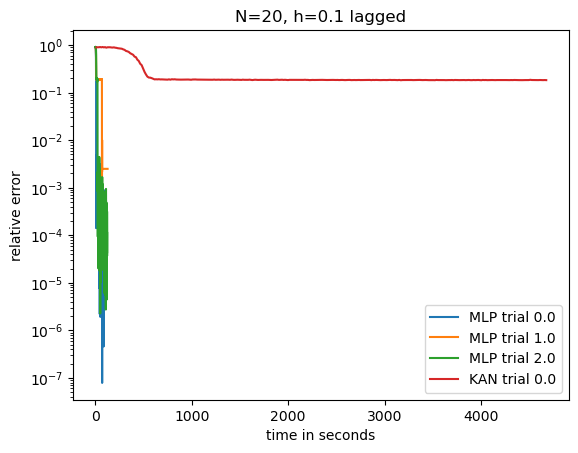

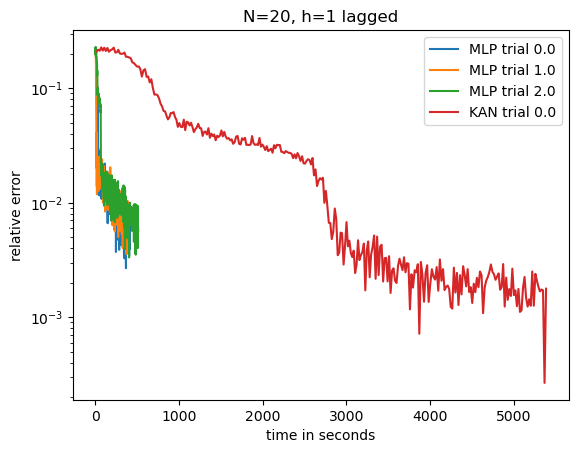

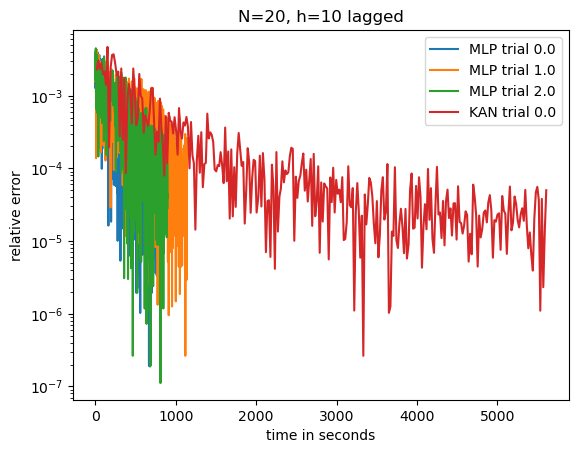

In [8]:
for N in [10, 20]:
    for h in [0.1, 1, 10]:
        true_gse = tfim_functions.ground_state_energy(h, N)
        for t in mlp_lagged['trial'].unique():
            mlp_energies = filter_data(mlp_lagged, 'energy', N, h, t)
            errors = abs((mlp_energies - true_gse) / true_gse)
            times = filter_data(mlp_lagged, 'epoch time', N, h, t).cumsum()
            plt.plot(times, errors, label = f'MLP trial {t}')
        for t in kan_lagged['trial'].unique():
            kan_energies = filter_data(kan_lagged, 'energy', N, h, t)
            errors = abs((kan_energies - true_gse) / true_gse)
            times = filter_data(kan_lagged, 'epoch time', N, h, t).cumsum()
            plt.plot(times, errors, label = f'KAN trial {t}')
        plt.xlabel('time in seconds')
        plt.ylabel('relative error')
        plt.legend(loc = 'best')
        plt.yscale('log')
        plt.title(f'N={N}, h={h} lagged')
        plt.show()

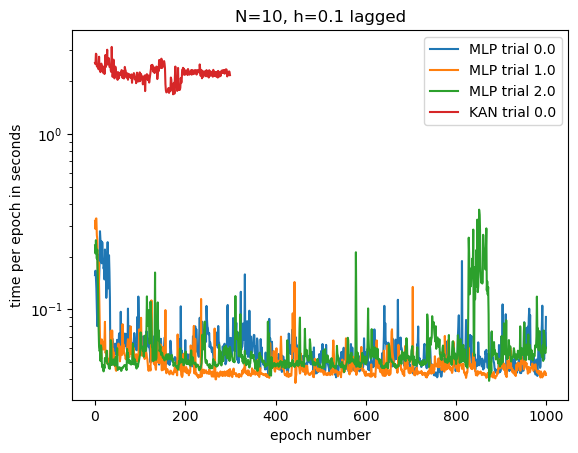

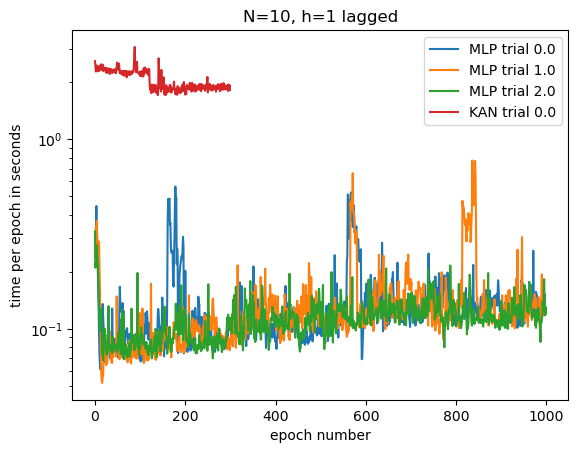

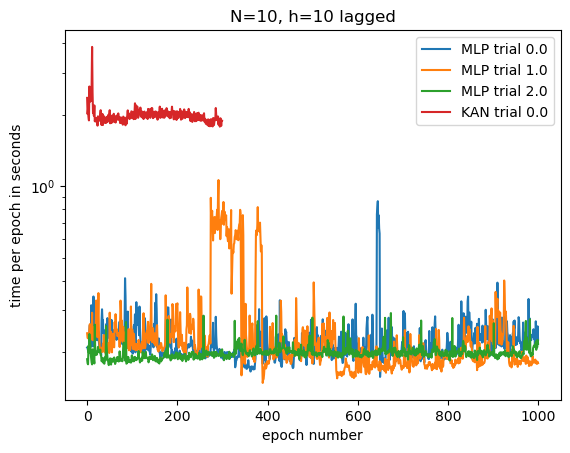

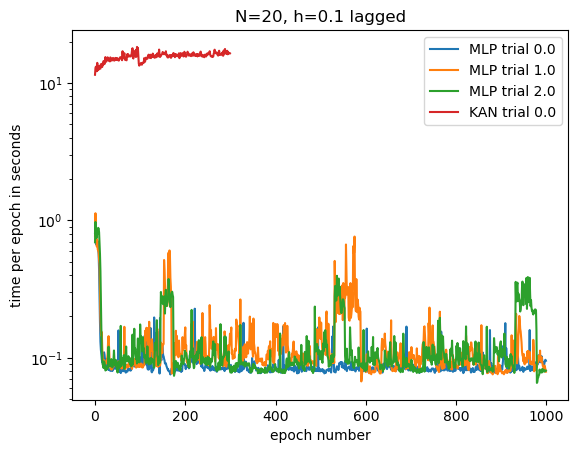

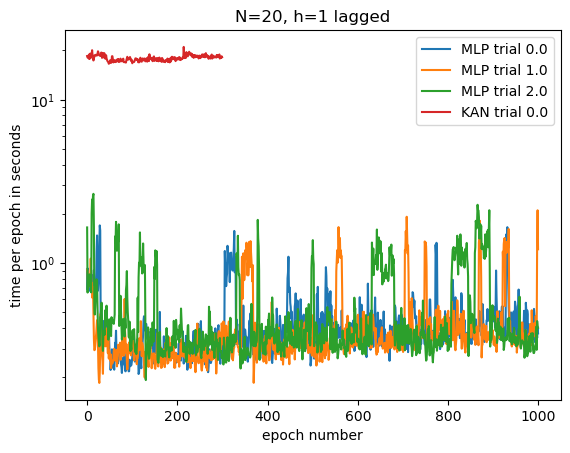

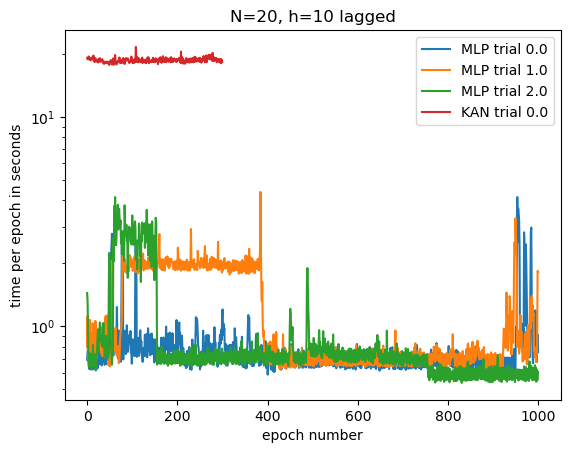

In [9]:
for N in [10, 20]:
    for h in [0.1, 1, 10]:
        true_gse = tfim_functions.ground_state_energy(h, N)
        for t in mlp_lagged['trial'].unique():
            times = filter_data(mlp_lagged, 'epoch time', N, h, t)#.cumsum()
            plt.plot(mlp_lagged['epoch'].unique(), times, label = f'MLP trial {t}')
        for t in kan_lagged['trial'].unique():
            times = filter_data(kan_lagged, 'epoch time', N, h, t)#.cumsum()
            plt.plot(kan_lagged['epoch'].unique(), times, label = f'KAN trial {t}')
        plt.xlabel('epoch number')
        plt.ylabel('time per epoch in seconds')
        # plt.ylabel('cumulative time')
        plt.yscale('log')
        plt.legend(loc = 'best')
        plt.title(f'N={N}, h={h} lagged')
        plt.show()

In [10]:
filter_data(mlp_lagged, 'energy', 10, 0.1, 0)

0      -0.762017
1      -1.112070
2      -1.246961
3      -1.753338
4      -2.738113
         ...    
995   -10.000001
996   -10.000001
997   -10.000001
998   -10.000001
999   -10.000001
Name: energy, Length: 1000, dtype: float64

In [11]:
filter_data(mlp_lagged, 'energy', 10, 0.1, 0).rolling(5).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4      -1.522500
         ...    
995   -10.000001
996   -10.000001
997   -10.000001
998   -10.000001
999   -10.000001
Name: energy, Length: 1000, dtype: float64

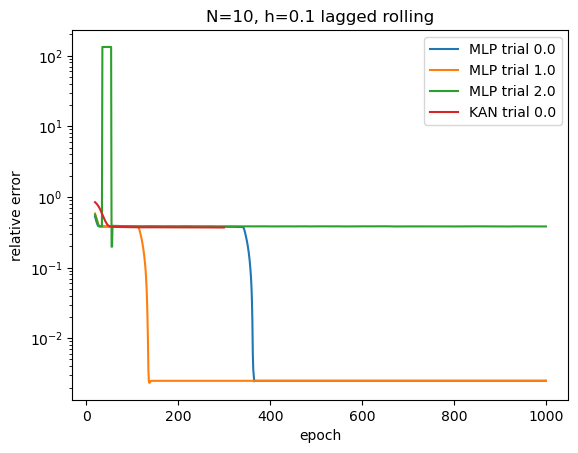

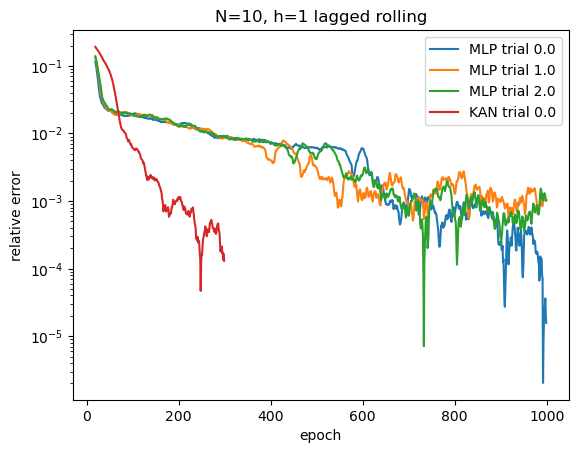

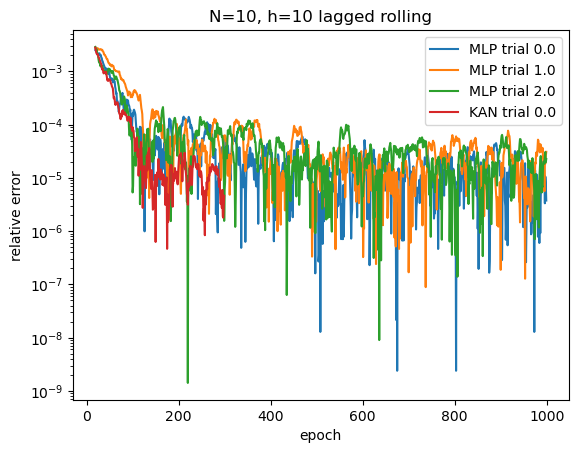

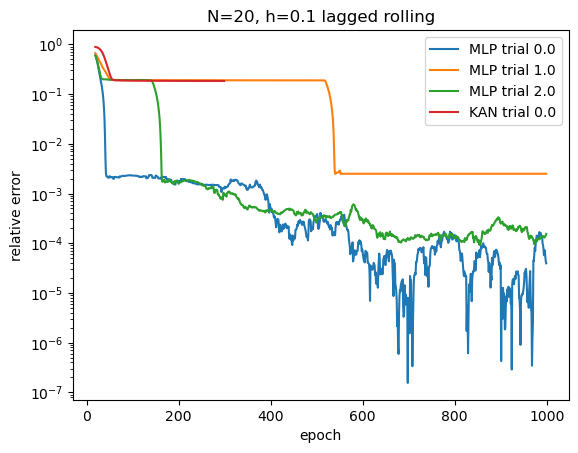

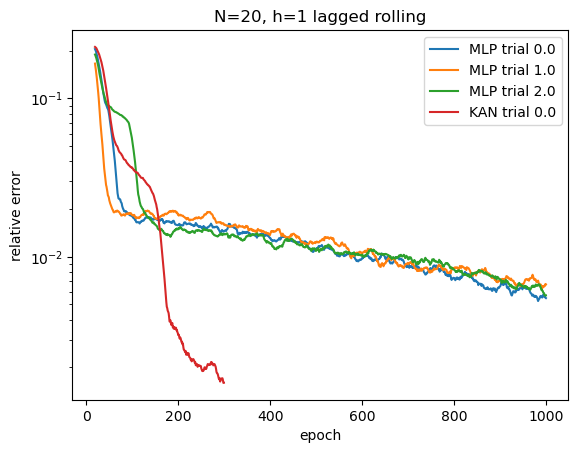

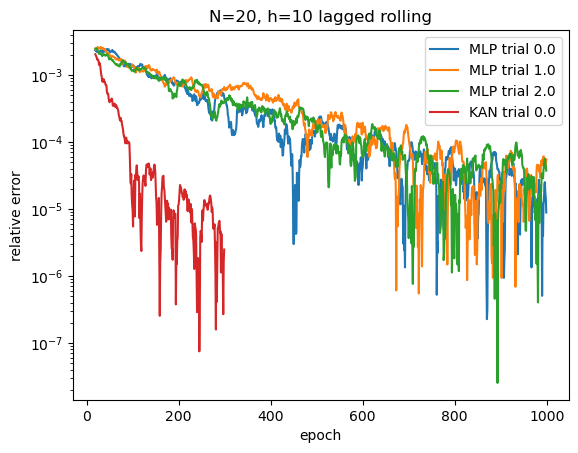

In [12]:
rolling_average_count = 20
for N in [10, 20]:
    for h in [0.1, 1, 10]:
        true_gse = tfim_functions.ground_state_energy(h, N)
        for t in mlp_lagged['trial'].unique():
            mlp_energies = filter_data(mlp_lagged, 'energy', N, h, t).rolling(rolling_average_count).mean()
            errors = abs((mlp_energies - true_gse) / true_gse)
            plt.plot(mlp_lagged['epoch'].unique(), errors, label = f'MLP trial {t}')
        for t in kan_lagged['trial'].unique():
            kan_energies = filter_data(kan_lagged, 'energy', N, h, t).rolling(rolling_average_count).mean()
            errors = abs((kan_energies - true_gse) / true_gse)
            plt.plot(kan_lagged['epoch'].unique(), errors, label = f'KAN trial {t}')
        plt.xlabel('epoch')
        plt.ylabel('relative error')
        plt.legend(loc = 'best')
        plt.yscale('log')
        plt.title(f'N={N}, h={h} lagged rolling')
        plt.show()

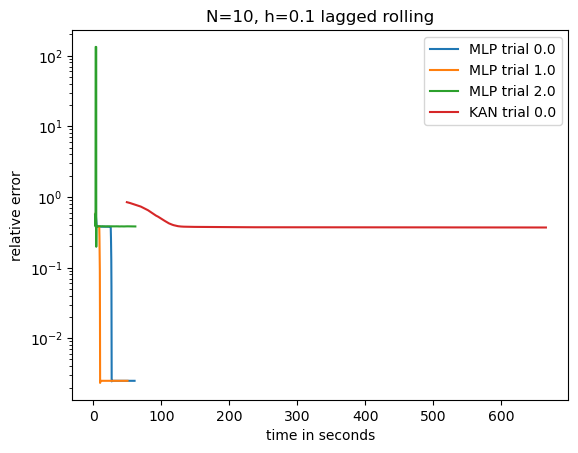

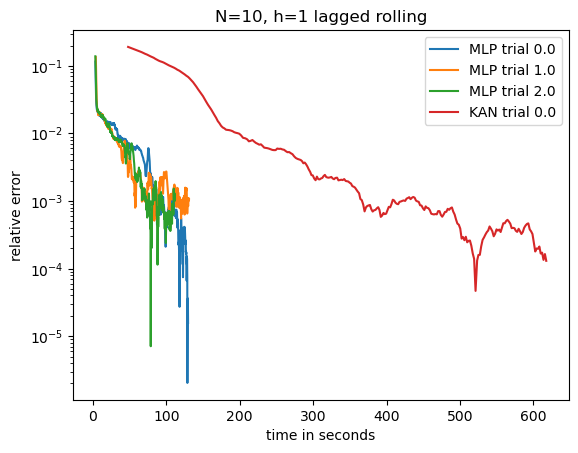

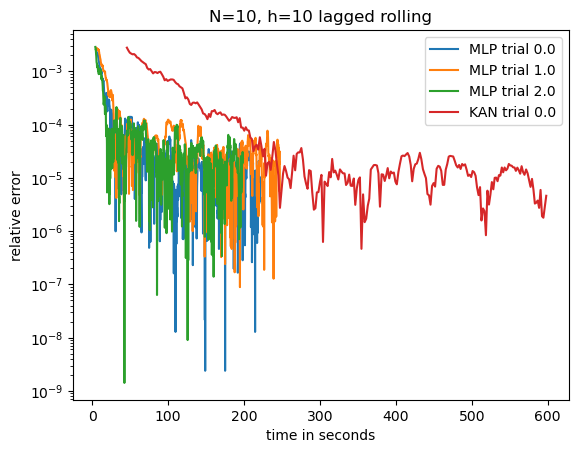

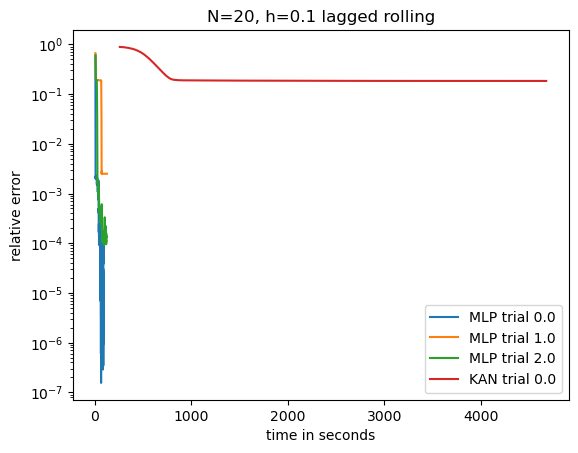

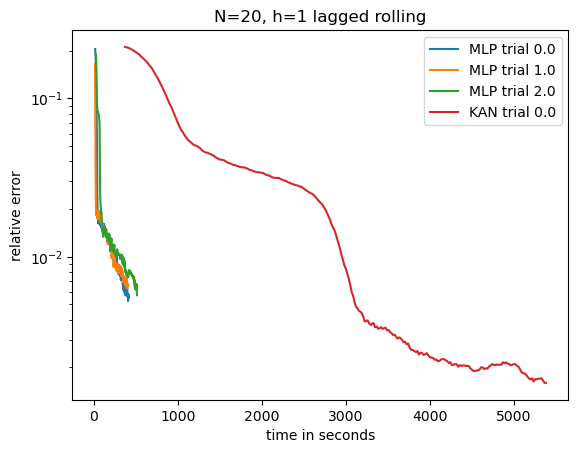

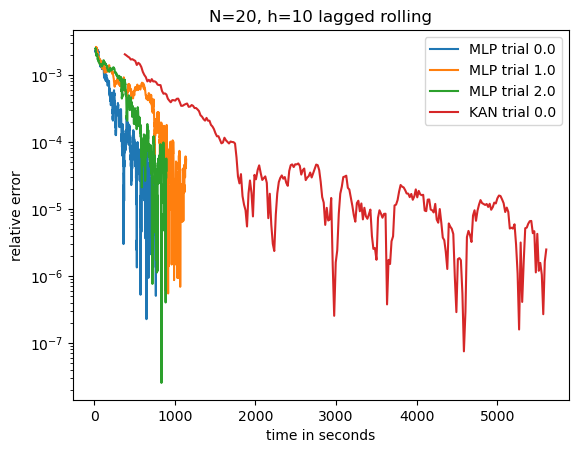

In [13]:
for N in [10, 20]:
    for h in [0.1, 1, 10]:
        true_gse = tfim_functions.ground_state_energy(h, N)
        for t in mlp_lagged['trial'].unique():
            mlp_energies = filter_data(mlp_lagged, 'energy', N, h, t).rolling(rolling_average_count).mean()
            errors = abs((mlp_energies - true_gse) / true_gse)
            times = filter_data(mlp_lagged, 'epoch time', N, h, t).cumsum()
            plt.plot(times, errors, label = f'MLP trial {t}')
        for t in kan_lagged['trial'].unique():
            kan_energies = filter_data(kan_lagged, 'energy', N, h, t).rolling(rolling_average_count).mean()
            errors = abs((kan_energies - true_gse) / true_gse)
            times = filter_data(kan_lagged, 'epoch time', N, h, t).cumsum()
            plt.plot(times, errors, label = f'KAN trial {t}')
        plt.xlabel('time in seconds')
        plt.ylabel('relative error')
        plt.legend(loc = 'best')
        plt.yscale('log')
        plt.title(f'N={N}, h={h} lagged rolling')
        plt.show()

In [14]:
critical_relative_errors = {(10, 1): 1e-3, (10, 10): 1e-4, (20, 1): 1e-2, (20, 10): 1e-4}
epoch_to_crit = {}
time_to_crit = {}
average_times = {}
data = pd.DataFrame({'N':[], 'h':[], 'model':[], 'epochs to critical':[], 'time_to_critical':[], 'time per epoch':[]})
data = data.set_index(['N', 'h', 'model'])
for N in [10, 20]:
    for h in [1, 10]:
        true_gse = tfim_functions.ground_state_energy(h, N)
        crit = critical_relative_errors[(N, h)]
        mlp_epochs = []
        mlp_times = []
        for t in mlp_lagged['trial'].unique():
            mlp_energies = np.array(filter_data(mlp_lagged, 'energy', N, h, t).rolling(rolling_average_count).mean())
            times = np.array(filter_data(mlp_lagged, 'epoch time', N, h, t).cumsum())
            for i, v in enumerate(mlp_energies):
                if abs((v - true_gse) / true_gse) < crit:
                    mlp_epochs.append(i)
                    mlp_times.append(times[i])
                    break
        min_index = 0
        for i in range(1, len(mlp_epochs)):
            if mlp_epochs[i] < mlp_epochs[min_index]:
                min_index = i
        epoch_to_crit[('MLP', N, h)]= mlp_epochs[min_index]
        time_to_crit[('MLP', N, h)] = mlp_times[min_index]
        average_times[('MLP', N, h)] = filter_data(mlp_lagged, 'epoch time', N, h, min_index).mean()
        data.loc[(N, h, 'MLP')] = [mlp_epochs[min_index], mlp_times[min_index], filter_data(mlp_lagged, 'epoch time', N, h, min_index).mean()]

        kan_epochs = []
        kan_times = []
        for t in kan_lagged['trial'].unique():
            kan_energies = np.array(filter_data(kan_lagged, 'energy', N, h, t).rolling(rolling_average_count).mean())
            times = np.array(filter_data(kan_lagged, 'epoch time', N, h, t).cumsum())
            for i, v in enumerate(kan_energies):
                if abs((v - true_gse) / true_gse) < crit:
                    kan_epochs.append(i)
                    kan_times.append(times[i])
                    break
        min_index = 0
        for i in range(1, len(kan_epochs)):
            if kan_epochs[i] < kan_epochs[min_index]:
                min_index = i
        epoch_to_crit[('KAN', N, h)]= kan_epochs[min_index]
        time_to_crit[('KAN', N, h)] = kan_times[min_index]
        average_times[('KAN', N, h)] = filter_data(kan_lagged, 'epoch time', N, h, min_index).mean()
        data.loc[(N, h, 'KAN')] = [kan_epochs[min_index], kan_times[min_index], filter_data(kan_lagged, 'epoch time', N, h, min_index).mean()]

for model, N, h in epoch_to_crit:
    print(f'{model} for N={N}, h={h} took {epoch_to_crit[(model, N, h)]} epochs to reach critical error')
    print(f'{model} for N={N}, h={h} took {time_to_crit[(model, N, h)]} seconds to reach critical error')
    print(f'{model} for N={N}, h={h} took on average {average_times[(model, N, h)]} seconds per epoch')

data.to_csv('data/summary_stats_n_10-20_lagged.csv')


MLP for N=10, h=1 took 546 epochs to reach critical error
MLP for N=10, h=1 took 57.43250346183777 seconds to reach critical error
MLP for N=10, h=1 took on average 0.13084596037864685 seconds per epoch
KAN for N=10, h=1 took 166 epochs to reach critical error
KAN for N=10, h=1 took 368.19037556648254 seconds to reach critical error
KAN for N=10, h=1 took on average 2.058706769148509 seconds per epoch
MLP for N=10, h=10 took 92 epochs to reach critical error
MLP for N=10, h=10 took 17.980159759521484 seconds to reach critical error
MLP for N=10, h=10 took on average 0.19848340725898742 seconds per epoch
KAN for N=10, h=10 took 97 epochs to reach critical error
KAN for N=10, h=10 took 196.05149912834167 seconds to reach critical error
KAN for N=10, h=10 took on average 1.9933071112632752 seconds per epoch
MLP for N=20, h=1 took 574 epochs to reach critical error
MLP for N=20, h=1 took 211.19180297851562 seconds to reach critical error
MLP for N=20, h=1 took on average 0.4046059811115265

In [15]:
data

epochs to critical  time_to_critical  time per epoch
N  h  model                                                      
10 1  MLP                 546.0         57.432503        0.130846
      KAN                 166.0        368.190376        2.058707
   10 MLP                  92.0         17.980160        0.198483
      KAN                  97.0        196.051499        1.993307
20 1  MLP                 574.0        211.191803        0.404606
      KAN                 166.0       2967.543122       17.952953
   10 MLP                 422.0        344.071706        0.771388
      KAN                  84.0       1577.968017       18.695802

In [16]:
N = 10; h=0.1
h_data = pd.read_csv('../KAN_MC/data/KAN_h_0.1_data.csv')

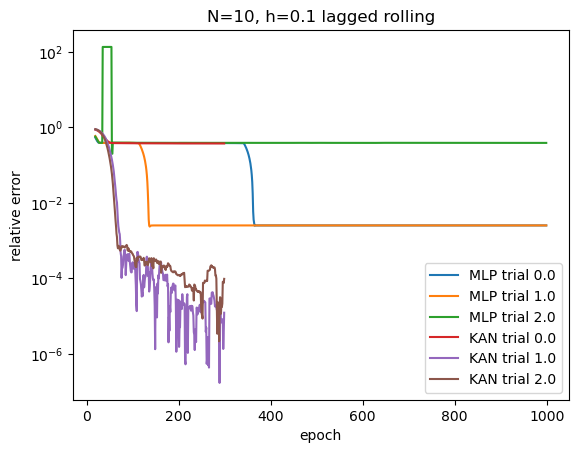

In [25]:
true_gse = tfim_functions.ground_state_energy(h, N)
for t in mlp_lagged['trial'].unique():
    mlp_energies = filter_data(mlp_lagged, 'energy', N, h, t).rolling(rolling_average_count).mean()
    mlp_errors = abs((mlp_energies - true_gse) / true_gse)
    plt.plot(mlp_lagged['epoch'].unique(), mlp_errors, label = f'MLP trial {t}')
for t in h_data['trial'].unique():
    kan_energies = filter_data(h_data, 'energy', N, h, t).rolling(rolling_average_count).mean()
    kan_errors = abs((kan_energies - true_gse) / true_gse)
    plt.plot(h_data['epoch'].unique(), kan_errors, label = f'KAN trial {t}')
plt.xlabel('epoch')
plt.ylabel('relative error')
plt.yscale('log')
plt.title(f'N={N}, h={h} lagged rolling')
plt.legend(loc = 'best')
plt.show()

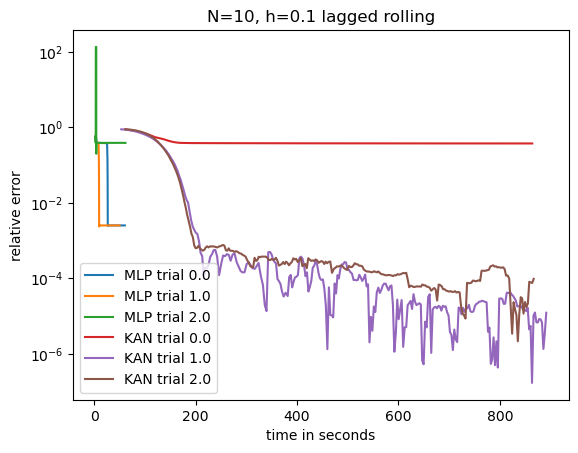

In [26]:
true_gse = tfim_functions.ground_state_energy(h, N)
for t in mlp_lagged['trial'].unique():
    mlp_energies = filter_data(mlp_lagged, 'energy', N, h, t).rolling(rolling_average_count).mean()
    mlp_errors = abs((mlp_energies - true_gse) / true_gse)
    times = filter_data(mlp_lagged, 'epoch time', N, h, t).cumsum()
    plt.plot(times, mlp_errors, label = f'MLP trial {t}')
for t in h_data['trial'].unique():
    kan_energies = filter_data(h_data, 'energy', N, h, t).rolling(rolling_average_count).mean()
    kan_errors = abs((kan_energies - true_gse) / true_gse)
    times = filter_data(h_data, 'epoch time', N, h, t).cumsum()
    plt.plot(times, kan_errors, label = f'KAN trial {t}')
plt.xlabel('time in seconds')
plt.ylabel('relative error')
plt.yscale('log')
plt.title(f'N={N}, h={h} lagged rolling')
plt.legend(loc = 'best')
plt.show()

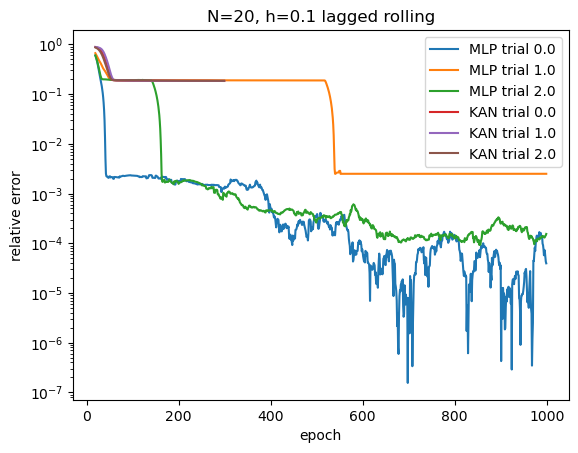

In [27]:
N = 20
true_gse = tfim_functions.ground_state_energy(h, N)
for t in mlp_lagged['trial'].unique():
    mlp_energies = filter_data(mlp_lagged, 'energy', N, h, t).rolling(rolling_average_count).mean()
    mlp_errors = abs((mlp_energies - true_gse) / true_gse)
    plt.plot(mlp_lagged['epoch'].unique(), mlp_errors, label = f'MLP trial {t}')
for t in h_data['trial'].unique():
    kan_energies = filter_data(h_data, 'energy', N, h, t).rolling(rolling_average_count).mean()
    kan_errors = abs((kan_energies - true_gse) / true_gse)
    plt.plot(h_data['epoch'].unique(), kan_errors, label = f'KAN trial {t}')
plt.xlabel('epoch')
plt.ylabel('relative error')
plt.yscale('log')
plt.title(f'N={N}, h={h} lagged rolling')
plt.legend(loc = 'best')
plt.show()

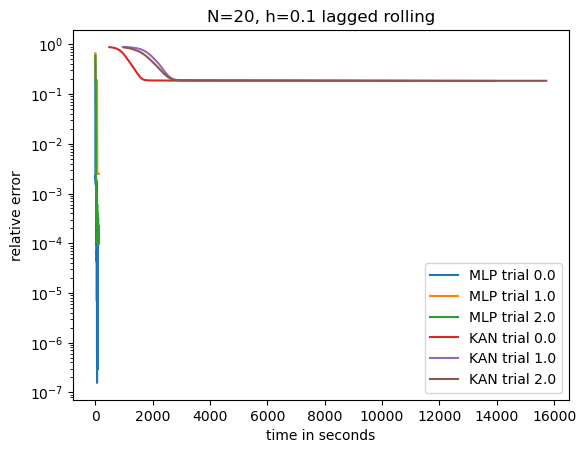

In [28]:
true_gse = tfim_functions.ground_state_energy(h, N)
for t in mlp_lagged['trial'].unique():
    mlp_energies = filter_data(mlp_lagged, 'energy', N, h, t).rolling(rolling_average_count).mean()
    mlp_errors = abs((mlp_energies - true_gse) / true_gse)
    times = filter_data(mlp_lagged, 'epoch time', N, h, t).cumsum()
    plt.plot(times, mlp_errors, label = f'MLP trial {t}')
for t in h_data['trial'].unique():
    kan_energies = filter_data(h_data, 'energy', N, h, t).rolling(rolling_average_count).mean()
    kan_errors = abs((kan_energies - true_gse) / true_gse)
    times = filter_data(h_data, 'epoch time', N, h, t).cumsum()
    plt.plot(times, kan_errors, label = f'KAN trial {t}')
plt.xlabel('time in seconds')
plt.ylabel('relative error')
plt.yscale('log')
plt.title(f'N={N}, h={h} lagged rolling')
plt.legend(loc = 'best')
plt.show()